<a href="https://colab.research.google.com/github/PerdomoVergaraFernando/Ecuaciones-Diferenciales-Parciales-2/blob/main/Metodo_Variacional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x,A1,A2 = sp.symbols('x,A1,A2') #introduciomos una variable
u = sp.Function('u') #Esto es una función
b1 = sp.Function('b1')
b2 = sp.Function('b2')

In [4]:
ode =u(x).diff(x,x) + u(x) - x**2
sp.dsolve(ode, u(x))

Eq(u(x), C1*sin(x) + C2*cos(x) + x**2 - 2)

In [5]:
sol = sp.dsolve(ode, ics={ u(0): 0, u(1): 0 }) # diccionario
sol

Eq(u(x), x**2 + (1 - 2*cos(1))*sin(x)/sin(1) + 2*cos(x) - 2)

In [6]:
#Comvertimos en un arreglo de numpy
u_expr = sol.rhs
u_num  = sp.lambdify(x, u_expr,"numpy")


In [7]:
xx = np.linspace(0, 1, 100) #np.linspace() Crea un array de números equiespaciados en un intervalo:
yy = u_num(xx)

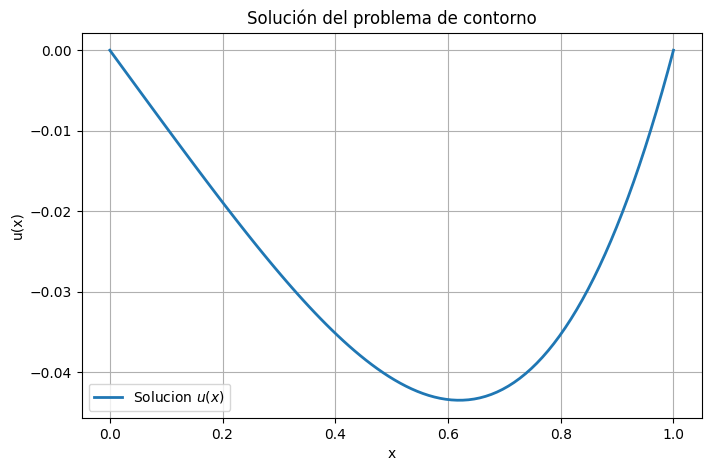

In [8]:
plt.figure(figsize=(8, 5)) #Crea una nueva figura para el gráfico
                            # figsize: (ancho, alto)
plt.plot(xx, yy, label="Solucion $u(x)$", linewidth=2) #Dibuja la solución como una línea
plt.title('Solución del problema de contorno') #Añade un título al gráfico
plt.xlabel('x') #Etiquetan los ejes
plt.ylabel('u(x)') #Etiquetan los ejes
plt.grid() #Añade una cuadrícula al gráfico
plt.legend() #Añade una leyenda al gráfico
plt.show() #Muestra el gráfico en pantalla

Metodo Numerico $N=2$


In [9]:
b1 = x*(1-x)
b2 = x**2*(1-x)


In [10]:
db1 = b1.diff(x)
db2 = b2.diff(x)
db1

1 - 2*x

In [11]:

db2

-x**2 + 2*x*(1 - x)

In [12]:
-db1**2+b1**2

x**2*(1 - x)**2 - (1 - 2*x)**2

In [13]:
K11 = sp.integrate(-db1*db1+b1*b1, (x, 0, 1))
K12 = sp.integrate(-db1*db2+b1*b2, (x, 0, 1))
K21 = sp.integrate(-db2*db1+b2*b1, (x, 0, 1))
K22 = sp.integrate(-db2*db2+b2*b2, (x, 0, 1))

In [14]:
print(K11,K12,K21,K22)


-3/10 -3/20 -3/20 -13/105


In [15]:
K = sp.Matrix([[K11,K12],
              [K21,K22]])


In [16]:
K

Matrix([
[-3/10,   -3/20],
[-3/20, -13/105]])

In [17]:
F1 = sp.integrate(x**2*b1, (x, 0, 1))
F2 = sp.integrate(x**2*b2, (x, 0, 1))
print(F1,F2)

1/20 1/30


In [18]:
F = sp.Matrix([[F1],
              [F2]])

In [19]:
F

Matrix([
[1/20],
[1/30]])

In [20]:
s=K.solve(F)
s


Matrix([
[-10/123],
[  -7/41]])

In [22]:
A1=s[0]
A2=s[1]
print(A1,A2)

-10/123 -7/41


In [24]:
u2 = A1*b1+A2*b2
u2

-7*x**2*(1 - x)/41 - 10*x*(1 - x)/123

In [26]:
u_approx_fn = sp.lambdify(x, u2, "numpy")

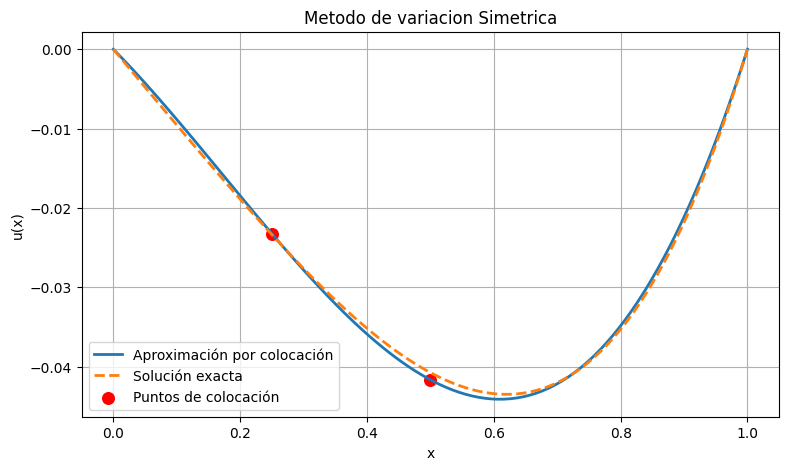

In [28]:
#Solución analítica y númerica
xx = np.linspace(0,1,100)
plt.figure(figsize=(9,5))
plt.plot(xx, u_approx_fn(xx), label="Aproximación por colocación", linewidth=2)
plt.plot(xx, yy, "--", label="Solución exacta", linewidth=2)

#puntos de colocación
plt.scatter([0.25,0.5], u_approx_fn(np.array([0.25,0.5])),
           color="red", s=70, label="Puntos de colocación")

plt.title("Metodo de variacion Simetrica")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid(True)
plt.legend()
plt.show()